## Assignment 1 
### G Seshu Babu
### CB.EN.P2CEN18003


In [23]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
get_ipython().magic(u'matplotlib inline')



## Question 1

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("total data =",len(X_train)+len(X_test))
print("each datasize = ",X_train[0].shape)

train_split = len(X_train)/(len(X_train)+len(X_test))
print('train_split_percent =',train_split*100)
print('test_split_percent = ',(1.0 - train_split)*100)
print('classes according to mnist data =',10)
print('classes according to gan architecture = ',2)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
total data = 70000
each datasize =  (28, 28)
train_split_percent = 85.71428571428571
test_split_percent =  14.28571428571429
classes according to mnist data = 10
classes according to gan architecture =  2


## Question 2

In [26]:
def displayData(m,n):
    plt.figure(figsize=(m, n))                  
    for i in range(m*n):
        #print(i) 
        plt.subplot(n, m, i+1)                      
        plt.imshow(X_train[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()


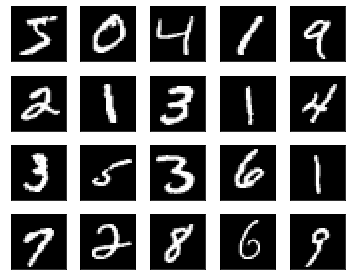

In [27]:
m = 5
n = 4
displayData(m,n)

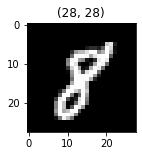

(0, 255)

In [28]:
sample = X_train[17]                

plt.figure(figsize=(3,2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

X_train.min(), X_train.max()

In [29]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [30]:
samples = 1
sample_size = 100

make_latent_samples(samples, sample_size)

array([[-0.53880935, -0.56795289,  2.02495837,  1.48823008, -0.30277948,
        -1.44130039,  0.64268599,  0.39107508, -0.59632086, -1.2921128 ,
         0.44518102, -0.83925823, -1.58308205, -0.0744075 , -0.43196239,
        -0.93410313,  0.93705368,  1.02501157, -2.56017463,  2.32717777,
        -0.29706253,  1.32757114,  0.28150272, -1.21720034,  0.84586518,
        -0.82925157,  1.04504986,  0.47519582, -1.06060392,  0.12203662,
        -1.77583674,  0.36469228, -1.21679931,  1.27711591,  0.5348283 ,
        -1.76336065, -0.24051451,  0.55903671, -1.83873017,  0.11680997,
         2.35566821,  0.06725677,  0.58896006, -0.85837192, -0.27758284,
         0.43555304,  0.60465023,  0.43342219,  0.44781576, -2.29238311,
        -0.12989699,  1.3995446 ,  0.09025259,  0.4275746 , -1.89105254,
        -0.95629806,  0.76156762, -0.57810668, -0.57290161,  0.53352227,
        -0.37461254,  0.1227846 ,  1.4045147 , -1.76944835, -1.15319452,
         1.06216752,  1.00192135, -0.95155858, -0.6

## Question 3

In [31]:
print('No of samples = ',samples)
print('each samplesize = ',sample_size)

No of samples =  1
each samplesize =  100


In [32]:
# for generator hyperparameters
g_hidden_size   = 128
leaky_alpha     = 0.01
input_shape=(sample_size,)
out = (len(X_train[0][0]))*(len(X_train[0][1]))
# for discriminator hyperparameter
d_hidden_size   = 128
leaky_alpha     = 0.01
inp = (len(X_train[0][0]))*(len(X_train[0][1]))


In [33]:
generator = Sequential([
    Dense(g_hidden_size, input_shape=(sample_size,)),
    LeakyReLU(leaky_alpha),
    Dense(out),
    Activation('tanh')
], name='generator')

generator.summary()

print("imput shape",input_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation_4 (Activation)    (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________
imput shape (100,)


## Question 4

In [34]:
def rand_uniform(p,seed=13):
    rand_nos = []
    c = 25173
    d = 13849
    m = 32768
    for i in range(n):
        seed = (c*seed + d) % m
        rand_nos.append(seed/m)
    return rand_nos


In [35]:
p = 5
q = 20
rand_uniform(p,q)

[0.787017822265625, 0.02227783203125, 0.222503662109375, 0.50732421875]

In [36]:
def rand_normal(p,mean,sd,seed):
    rand_nos = []
    uni_rn = rand_uniform(n,seed)
    for i in range(n):
        an = mean+sd* np.sqrt(-2*np.log(uni_rn[i])) *\
                             np.cos(2 * np.pi * uni_rn[i])
        rand_nos.append(an)
    return rand_nos


In [37]:
p = 5
me = 0
sd = 1
q = 20
rand_normal(p,me,sd,q)

[0.15952899712976093,
 2.7313414051473486,
 0.29802960941944734,
 -1.1637601713566574]

## Question 5

### The main aim of generator is generating fake data which is similar to real data, coming to architecture it has one input layer, one hidden layer and one output layer which generate data similer to real data.  

### input shape = (100,1) =(samp_size,)  which is a random noise vector.
### output shape = (784,1)=(out,)  real data size(28,28) converted to vector(784,1). 
### learnable parameters = 114064
### computations = 114064

In [38]:
discriminator = Sequential([
    Dense(d_hidden_size, input_shape=(inp,)),
    LeakyReLU(leaky_alpha),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Question 6


### The main aim of Discriminator is classifing whether given data is fake or real,coming to architecture there is one input layer, one hidden layer and one output layer which classifies real or fake. 

### input shape = (784,1)  is a real data of size(28,28) convert to(784,1) vector.
### output shape = (1,1) real data or fake_generated data.
### learnable parameters = 100609
### computations = 100609

##  Question 7

### Relations between Generator and discriminator ?

### Generator part is generate(create) data which seems as similar as real data but not real data and pass this fake data to Discriminator.

### At the same time we pass real data to Discriminator. 

### Now, coming to discriminator part, it's aim is to classify(classifier) whether the given data is fake or real. 

In [39]:
gan = Sequential([
    generator,
    discriminator
])

gan.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Sequential)       (None, 784)               114064    
_________________________________________________________________
discriminator (Sequential)   (None, 1)                 100609    
Total params: 214,673
Trainable params: 214,673
Non-trainable params: 0
_________________________________________________________________


In [40]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable


In [41]:
make_trainable(discriminator, False)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 0
Non-trainable params: 100,609
_________________________________________________________________


In [42]:
make_trainable(discriminator, True)
discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [43]:
def make_simple_GAN(sample_size, 
                    g_hidden_size, 
                    d_hidden_size, 
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 


In [44]:
def preprocess(x):    
    x = x.reshape(-1, 784) # 784=28*28
    print(x.shape)
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    #print(x)
    return x


In [45]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

(60000, 784)
(10000, 784)


## Question 8

### Initally we reshape 3D(60000,28,28) to 2D(60000,784) by converting image(28,28) to a vector(784,) in above function we reshape to(-1,784) here -1 give last image index value(60000) and 784 is each image shape(28,28).
### the main aim is to normalize the pixels(0,255) to range(-1,1).
### clip method used to change values less then -1 takes as -1 and value greater then 1 takes as 1 when we use numpy.clip(data,-1,1)

In [46]:
print(X_train_real.max())
print(X_train_real.min())

1.0
-1.0


In [47]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x


In [48]:
def realData(m,n):
    plt.figure(figsize=(5, 4))
    for i in range(20):
        img = deprocess(X_train_real[i])
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    #print(plt.yticks([]))
    plt.tight_layout()
    plt.show()


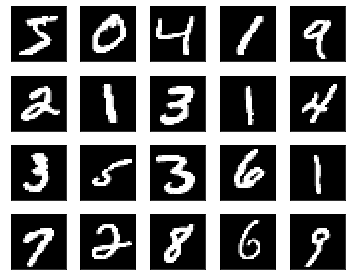

In [49]:
m = 5
n = 4
realData(m,n)

In [50]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [51]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

## Question 9

### Here, size defines as number of real data and fake data, in above data they took 10 data samples to make understand
### In GAN model, we are classifing real or fake, that is real as 1(one), fake as 0(zero)
### So here we are creating 10(ten) 1's(ones) vector and 10(ten) 0's(zeros) vector using numpy
### making 1's as real label and 0's as fake label

## Question 11

W0802 13:12:34.801032  6940 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0802 13:12:34.802005  6940 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 13:12:34.858043  6940 deprecation_wrapper.py:119] From C:\Users\seshubabu\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 13:12:34.865024  6940 deprecation.py:323] From C:\Users\seshubabu\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future versi

Epoch:   1/20 Discriminator Loss: 0.1205 Generator Loss: 3.5826
Epoch:   2/20 Discriminator Loss: 1.4529 Generator Loss: 0.3357
Epoch:   3/20 Discriminator Loss: 0.1822 Generator Loss: 2.6572
Epoch:   4/20 Discriminator Loss: 0.2387 Generator Loss: 4.7042
Epoch:   5/20 Discriminator Loss: 0.2350 Generator Loss: 2.0863
Epoch:   6/20 Discriminator Loss: 0.4572 Generator Loss: 3.0637
Epoch:   7/20 Discriminator Loss: 0.4442 Generator Loss: 3.4869
Epoch:   8/20 Discriminator Loss: 0.5607 Generator Loss: 1.1694
Epoch:   9/20 Discriminator Loss: 0.1893 Generator Loss: 2.6737
Epoch:  10/20 Discriminator Loss: 0.2953 Generator Loss: 3.2582


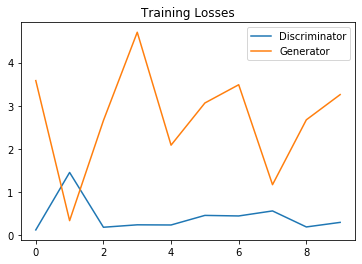

Epoch:  11/20 Discriminator Loss: 0.1687 Generator Loss: 5.2116
Epoch:  12/20 Discriminator Loss: 0.5078 Generator Loss: 2.0888
Epoch:  13/20 Discriminator Loss: 0.3985 Generator Loss: 5.0910
Epoch:  14/20 Discriminator Loss: 0.2085 Generator Loss: 3.5196
Epoch:  15/20 Discriminator Loss: 0.3470 Generator Loss: 1.8139
Epoch:  16/20 Discriminator Loss: 0.3124 Generator Loss: 2.4517
Epoch:  17/20 Discriminator Loss: 0.6696 Generator Loss: 3.9847
Epoch:  18/20 Discriminator Loss: 0.4674 Generator Loss: 3.5774
Epoch:  19/20 Discriminator Loss: 0.5920 Generator Loss: 3.3144
Epoch:  20/20 Discriminator Loss: 0.5149 Generator Loss: 2.6932


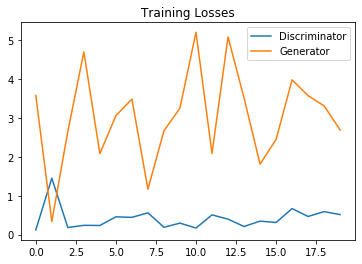

In [52]:
# hyperparameters
sample_size     = 100   
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001
d_learning_rate = 0.001 

epochs          = 20

batch_size      = 64
eval_size       = 16  

smooth          = 0.1

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size, 
    d_hidden_size, 
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)

y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)



losses = []

for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)
        
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
        
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)
    
    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real)
    
    losses.append((d_loss, g_loss))
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss)) 
    
    if ((e+1)%10 == 0):
        loss_ = np.array(losses)
            
        fig, ax = plt.subplots()
        plt.plot(loss_.T[0], label='Discriminator')
        plt.plot(loss_.T[1], label='Generator')
        plt.title("Training Losses")
        plt.legend()
        plt.show()
        


## Question 10

### sample_size = Random noise vector 
### g_hidden_size
### d_hidden_size
### leaky alpha
### d_learning_rate
### g_learning_rate

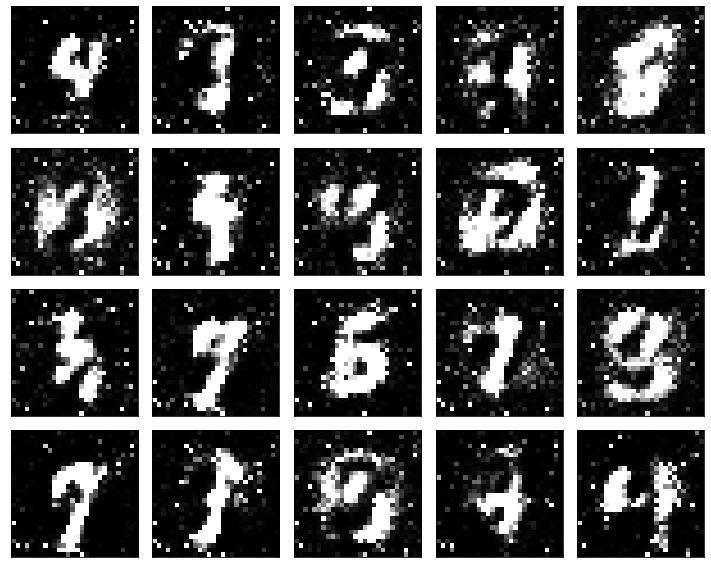

In [53]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


## question 12

## steps of work flow of GAN

### generate sample minibatch of m noise samples (which are fake images) 
### choose minibatch of m real images from your dataset
### train the discriminator with m * 2 (both real and fake) images by freezing generator part
### then is discriminator only update
### then freez the discriminator and run the gan
### repeat 1 to 4 for all minibatches
### train the generator by freezing discriminator
### then update the generator 
### train this for many epochs